In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns

In [2]:
df = pd.read_csv("water_potability.csv")

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [72]:
df_sub = df.drop(columns=['Hardness', 'ph', 'Solids', 'Chloramines', 'Potability', 'Turbidity', 'Conductivity'])

In [73]:
df_sub.head()

,Sulfate,Organic_carbon,Trihalomethanes
0,368.516441,10.379783,86.990970
1,NaN,15.180013,56.329076
2,NaN,16.868637,66.420093
3,356.886136,18.436524,100.341674
4,310.135738,11.558279,31.997993


In [74]:
df_sub = df_sub.dropna()

In [75]:
sulfate = df_sub.Sulfate
organic_carbon = df_sub.Organic_carbon
trihalomethanes = df_sub.Trihalomethanes

<AxesSubplot:xlabel='Sulfate', ylabel='Count'>

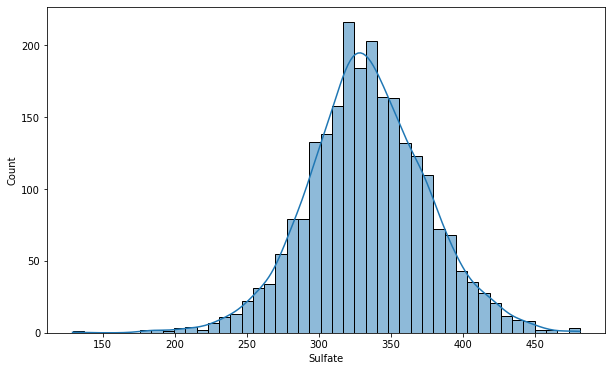

In [76]:
plt.figure(figsize=(10, 6))
sns.histplot(sulfate, kde=True)

<AxesSubplot:xlabel='Organic_carbon', ylabel='Count'>

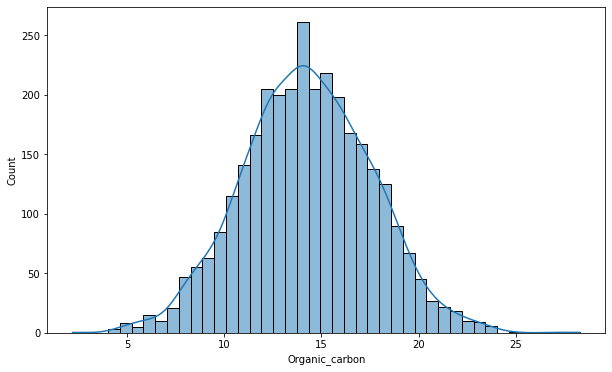

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(organic_carbon, kde=True)

<AxesSubplot:xlabel='Trihalomethanes', ylabel='Count'>

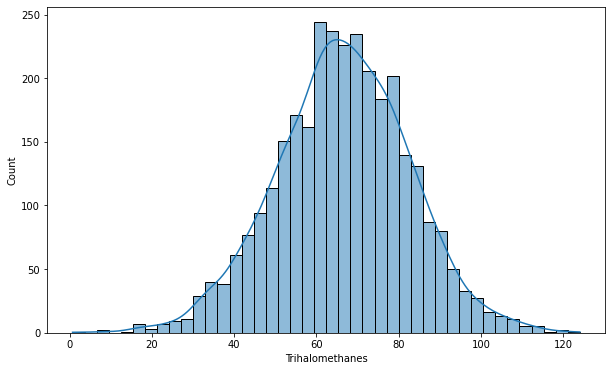

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(trihalomethanes, kde=True)

DescribeResult(nobs=2373, minmax=(129.00000000000003, 481.0306423059972), mean=333.642004545906, variance=1715.7198686588824, skewness=-0.03499477236198241, kurtosis=0.6455256195492765)

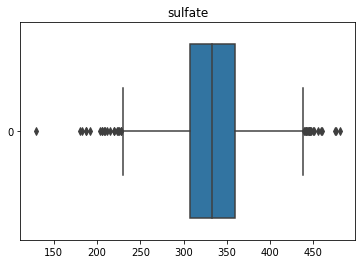

In [78]:
sns.boxplot(data=sulfate, orient='h')
plt.title("sulfate")
scipy.stats.describe(sulfate)

DescribeResult(nobs=3114, minmax=(2.1999999999999886, 28.30000000000001), mean=14.280720537834917, variance=11.001778454532406, skewness=0.026998160909655962, kurtosis=0.05115381912055916)

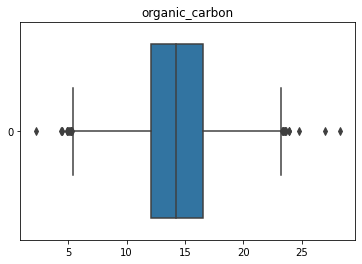

In [46]:
sns.boxplot(data=organic_carbon, orient='h')
plt.title("organic_carbon")
scipy.stats.describe(organic_carbon)

DescribeResult(nobs=3114, minmax=(0.7379999999999995, 124.0), mean=66.39629294676803, variance=261.6308974588445, skewness=-0.08299067321849515, kurtosis=0.23628834425058365)

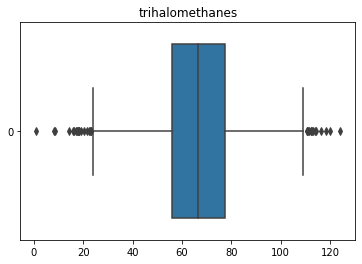

In [47]:
sns.boxplot(data=trihalomethanes, orient='h')
plt.title("trihalomethanes")
scipy.stats.describe(trihalomethanes)

In [48]:
from scipy.stats import norm

In [79]:
params_sulfate = norm.fit(sulfate, method="MM")
params_organic_carbon = norm.fit(organic_carbon, method="MM")
params_trihalomethanes = norm.fit(trihalomethanes, method="MM")

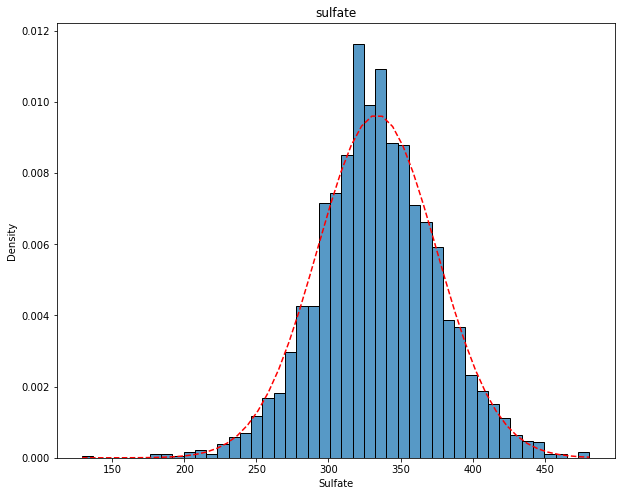

In [80]:
plt.figure(figsize=(10, 8))
plt.title("sulfate")
sns.histplot(sulfate, kde=False, stat='density')
x = np.linspace(np.min(sulfate), np.max(sulfate))
pdf = scipy.stats.norm.pdf(x, *params_sulfate) 
plt.plot(x, pdf, 'r--')

In [82]:
scipy.stats.kstest(sulfate, 'norm', params_sulfate)

KstestResult(statistic=0.02243557387100803, pvalue=0.18059222146409026)

In [91]:
scipy.stats.cramervonmises(sulfate, 'norm', params_sulfate)

CramerVonMisesResult(statistic=0.34436643623158686, pvalue=0.10185423161578688)

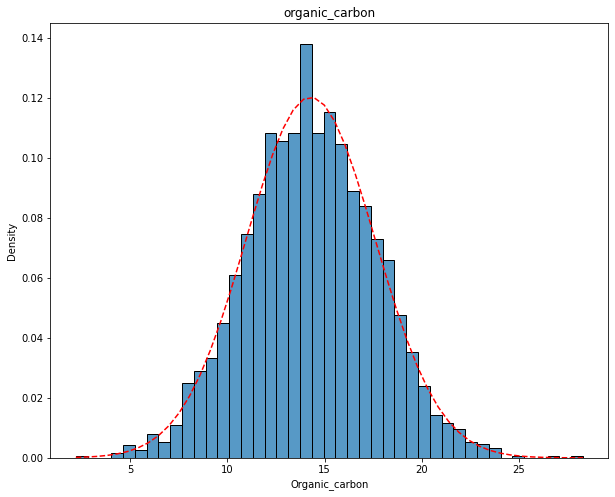

In [67]:
plt.figure(figsize=(10, 8))
plt.title("organic_carbon")
sns.histplot(organic_carbon, kde=False, stat='density')
x = np.linspace(np.min(organic_carbon), np.max(organic_carbon))
pdf = scipy.stats.norm.pdf(x, *params_organic_carbon) 
plt.plot(x, pdf, 'r--')

In [90]:
scipy.stats.kstest(organic_carbon, 'norm', params_organic_carbon)

KstestResult(statistic=0.01249179778754994, pvalue=0.848148952232119)

In [89]:
scipy.stats.cramervonmises(organic_carbon, 'norm', params_organic_carbon)

CramerVonMisesResult(statistic=0.047282171023285816, pvalue=0.8926161341464085)

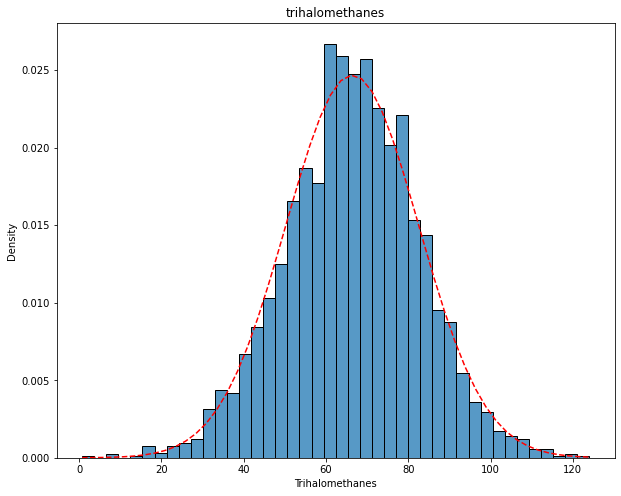

In [55]:
plt.figure(figsize=(10, 8))
plt.title("trihalomethanes")
sns.histplot(trihalomethanes, kde=False, stat='density')
x = np.linspace(np.min(trihalomethanes), np.max(trihalomethanes))
pdf = scipy.stats.norm.pdf(x, *params_trihalomethanes) 
plt.plot(x, pdf, 'r--')

In [86]:
scipy.stats.kstest(trihalomethanes, 'norm', params_trihalomethanes)

KstestResult(statistic=0.023414980226688142, pvalue=0.1458796275142239)

In [88]:
scipy.stats.cramervonmises(trihalomethanes, 'norm', params_trihalomethanes)

CramerVonMisesResult(statistic=0.11933287466782826, pvalue=0.4981746292786823)

Text(0.5, 1.0, 'QQ-plot Sulfate')

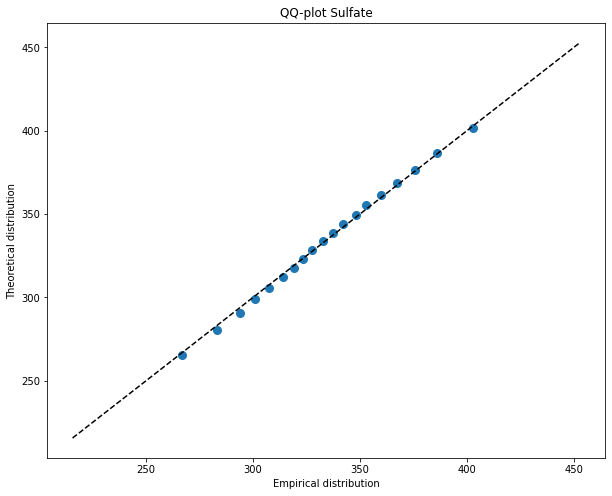

In [132]:
# Calculation of quantiles
percs = np.linspace(5, 95, 19)
qn_first = np.percentile(sulfate, percs)
qn_norm = scipy.stats.norm.ppf(percs / 100.0, *params_sulfate)


min_qn = np.min([qn_first.min(), qn_norm.min()])
max_qn = np.max([qn_first.max(), qn_norm.max()])
x = np.linspace(min_qn - 50, max_qn + 50)

# Building a quantile biplot
plt.figure(figsize=(10, 8))
plt.plot(qn_first, qn_norm, ls="", marker="o", markersize=8)
plt.plot(x, x, color="k", ls="--")
plt.xlabel('Empirical distribution')
plt.ylabel('Theoretical distribution')

plt.title('QQ-plot Sulfate')

In [ ]:
# Calculation of quantiles
percs = np.linspace(5, 95, 19)
qn_first = np.percentile(sulfate, percs)
qn_norm = scipy.stats.norm.ppf(percs / 100.0, *params_sulfate)


min_qn = np.min([qn_first.min(), qn_norm.min()])
max_qn = np.max([qn_first.max(), qn_norm.max()])
x = np.linspace(min_qn - 50, max_qn + 50)

# Building a quantile biplot
plt.figure(figsize=(10, 8))
plt.plot(qn_first, qn_norm, ls="", marker="o", markersize=8)
plt.plot(x, x, color="k", ls="--")
plt.xlabel('Empirical distribution')
plt.ylabel('Theoretical distribution')

plt.title('QQ-plot Sulfate')

Text(0.5, 1.0, 'QQ-plot Organic carbon')

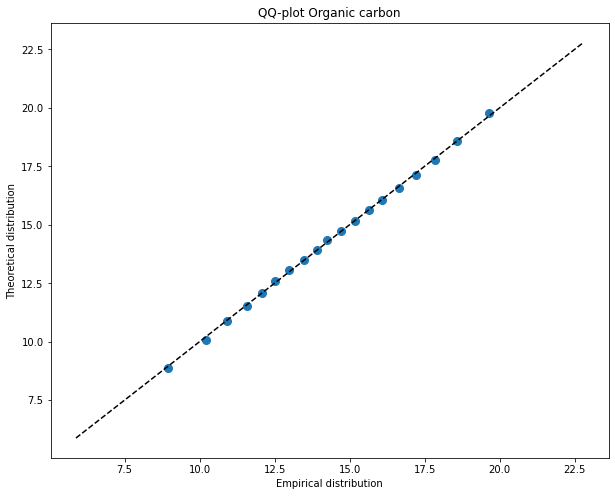

In [137]:
# Calculation of quantiles
percs = np.linspace(5, 95, 19)
qn_first = np.percentile(organic_carbon, percs)
qn_norm = scipy.stats.norm.ppf(percs / 100.0, *params_organic_carbon)

min_qn = np.min([qn_first.min(), qn_norm.min()])
max_qn = np.max([qn_first.max(), qn_norm.max()])
x = np.linspace(min_qn - 3, max_qn + 3)

# Building a quantile biplot
plt.figure(figsize=(10, 8))
plt.plot(qn_first, qn_norm, ls="", marker="o", markersize=8)
plt.plot(x, x, color="k", ls="--")
plt.xlabel('Empirical distribution')
plt.ylabel('Theoretical distribution')

plt.title('QQ-plot Organic carbon')
